# Charming battle (three attributes game + card mechanics)

Each action has 3 numerical atributes -- charm (CHM), intelligence (INT), power (PWR).  The three attributes are ranked for tiebreaking.  You win if your action is greater than the opponent's action in 2 out of 3 attributes.  In case that one attribute is tied, the tie is broken based on the rank of the winning attribute.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [246]:
# A set of 9 battler archetypes
vectors=np.array([[3,4,2],[4,3,2],[2,4,4],[4,5,0],[5,0,4],[0,5,5],[1,2,6],[1,6,1],[6,1,1]])
#names = np.array(["P1","P2","P3","S1","S2","S3","R1","R2","R3"])
names = np.array(["PP","PS","PR","SP","SS","SR","RP","RS","RR"])



In [197]:
def compute_payoff(vectors1, vectors2):
    a0_dom = np.sign(vectors1[:, [0]] - vectors2[:, [0]].T)
    a1_dom = np.sign(vectors1[:, [1]] - vectors2[:, [1]].T)
    a2_dom = np.sign(vectors1[:, [2]] - vectors2[:, [2]].T)
    scores1 = 4 * (a0_dom > 0).astype(int) + 3 * (a1_dom > 0).astype(int) + 2 * (a2_dom > 0).astype(int)
    scores2 = 4 * (a0_dom < 0).astype(int) + 3 * (a1_dom < 0).astype(int) + 2 * (a2_dom < 0).astype(int)    
    win_mat = (scores1 > scores2).astype(int) - (scores1 < scores2).astype(int)
    p_sign = np.sign(win_mat)
    return p_sign

# function to form payoff matrix from signs and rewards
def form_payoff(p_sign, rewards):
    payoff = np.dot(np.diag(rewards), (p_sign==1))
    payoff = payoff - payoff.T
    return payoff

def tune_rewards(p_sign, target_p, learning_rate = 0.002, n_iterations = 50000):
    # uniform rewards to begin
    rewards = np.ones(len(p_sign))
    # determine values of strategies
    # decrease the rewards of high-value strategies and increase the rewards of low-value strategies
    all_rewards = []
    all_values = []

    for iter_no in range(n_iterations):
        all_rewards.append(rewards)
        payoff = form_payoff(p_sign, rewards)
        values = np.dot(payoff, target_p)
        all_values.append(values)
        rewards = rewards - learning_rate * values

    all_rewards = np.array(all_rewards)
    all_values = np.array(all_values)
    return rewards, values, all_rewards, all_values

def evolve_strategy(payoff, probs, learning_rate = 0.0005, n_iterations = 1000000):

    all_probs = []
    all_values = []

    for iter_no in range(n_iterations):
        all_probs.append(probs)
        #probs = np.mean(all_probs, 0)
        #print(probs)
        values = np.dot(payoff, probs)
        all_values.append(values)
        probs = probs * (1 + learning_rate * values)
        probs = probs/np.sum(probs)

    all_probs = np.array(all_probs)
    all_values = np.array(all_values)
    probs = np.mean(all_probs[int(n_iterations/2):, :], 0)
    values = np.dot(payoff, probs)
    return probs, values, all_probs, all_values


In [198]:
p_sign = compute_payoff(vectors, vectors)

## Modifer analysis

In [222]:
attr_boost_1 = 2
vectors2 = vectors.copy()
vectors2[:, attr_boost_1] = vectors2[:, attr_boost_1]+1
p_sign2 = compute_payoff(vectors2, vectors)

In [223]:
vectors2

array([[3, 4, 3],
       [4, 3, 3],
       [2, 4, 5],
       [4, 5, 1],
       [5, 0, 5],
       [0, 5, 6],
       [1, 2, 7],
       [1, 6, 2],
       [6, 1, 2]])

In [224]:
p_sign

array([[ 0, -1,  1, -1, -1, -1,  1,  1,  1],
       [ 1,  0, -1, -1, -1, -1,  1,  1,  1],
       [-1,  1,  0, -1, -1, -1,  1,  1,  1],
       [ 1,  1,  1,  0, -1,  1,  1, -1, -1],
       [ 1,  1,  1,  1,  0, -1, -1,  1, -1],
       [ 1,  1,  1, -1,  1,  0, -1, -1,  1],
       [-1, -1, -1, -1,  1,  1,  0, -1,  1],
       [-1, -1, -1,  1, -1,  1,  1,  0, -1],
       [-1, -1, -1,  1,  1, -1, -1,  1,  0]])

In [225]:
p_sign2

array([[ 1,  1,  1, -1, -1, -1,  1,  1,  1],
       [ 1,  1, -1, -1, -1, -1,  1,  1,  1],
       [-1,  1,  1, -1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1, -1,  1,  1,  1, -1],
       [ 1,  1,  1,  1,  1,  1, -1,  1, -1],
       [ 1,  1,  1, -1,  1,  1, -1, -1,  1],
       [-1, -1, -1, -1,  1,  1,  1, -1,  1],
       [-1, -1, -1,  1, -1,  1,  1,  1,  1],
       [ 1,  1, -1,  1,  1, -1, -1,  1,  1]])

In [226]:
p_sign2 - p_sign

array([[1, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 2, 2, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 1, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 2],
       [2, 2, 0, 0, 0, 0, 0, 0, 1]])

In [238]:
p_sign_avg = 0 * p_sign.copy()
# compute average payoff under joint distribution of modifiers
modifier_prob = np.array([0.05, 0.05, 0.05, 0.85]) # element[3] is no modification
for i in range(4):
    for j in range(4):
        vectors1 = vectors.copy()
        vectors2 = vectors.copy()
        if i < 3:
            vectors1[:, i] = vectors1[:, i]+1
        if j < 3:
            vectors2[:, j] = vectors2[:, j]+1
        p_sign_mod = compute_payoff(vectors1, vectors2)
        p_sign_avg = p_sign_avg + modifier_prob[i] * modifier_prob[j] * p_sign_mod

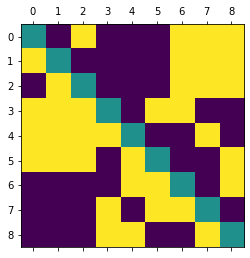

In [239]:
plt.matshow(p_sign)

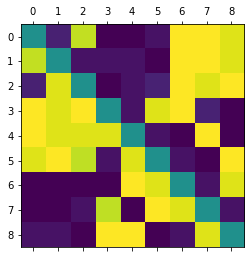

In [240]:
plt.matshow(p_sign_avg)

In [241]:
rewards, values, all_rewards, all_values = tune_rewards(p_sign_avg, np.ones(n)/n)
rewards

array([0.70550895, 0.62923664, 0.11440733, 0.22881377, 1.18220419,
       1.25847326, 1.67796738, 2.51694783, 0.68644066])

In [242]:
probs, values, all_probs, all_values = evolve_strategy(p_sign_avg, np.ones(n)/n, 0.0001, 1000000)

In [249]:
results = pd.DataFrame({
    'name': names,
    'CHM': vectors[:, 0], 'INT': vectors[:, 1], 'PWR': vectors[:, 2], 
    #'reward':rewards,
    #'total': np.sum(vectors, 1),
    'prob': np.floor(probs* 1000)/10})
#results.iloc[np.argsort(-probs), :].reset_index(drop = True)
results.set_index('name')

,CHM,INT,PWR,prob
name,,,,
PP,3,4,2,6.7
PS,4,3,2,2.7
PR,2,4,4,3.0
SP,4,5,0,11.1
SS,5,0,4,9.0
SR,0,5,5,23.2
RP,1,2,6,6.5
RS,1,6,1,21.0
RR,6,1,1,16.4
